In [12]:
import pdfplumber
import re
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:
def pdf_info(pdf_name):

    TEXT = ""
    
    with pdfplumber.open(pdf_name) as pdf:

        for n in range(0,40): 
            page = pdf.pages[n]
            text = page.extract_text()
            if text != None:
                TEXT += text
            else:
                pass
    
 
    TEXT_clear = TEXT.replace("\n","")
    TEXT_2 = re.findall("公司简介和主要财务指标(.*?)公司业务概要",TEXT_clear,re.S)[1]
    
  
    index_name = ["股票简称","股票代码","公司的法定代表人","办公地址","公司国际互联网网址","电子信箱"]
    index_name_cut = ["股票代码","公司的中文名称","注册地址","办公地址的邮政编码","电子信箱","二、联系人和联系方式"]
    values_1 = []
    str_re1 = ""
    t = 0

    while t < len(index_name):
        str_re1 = str(index_name[t]) + "(.*?)" + str(index_name_cut[t])
        value = re.findall(str_re1,TEXT_2,re.S)[0].replace("\n","").strip()
        values_1.append(value)
        t += 1
    

    l1 = values_1[0:1] + [str(values_1[1])[0:7]] + values_1[2:]  
    str_re2_1 = re.findall("五、主要会计数据和财务指标(.*?)六、分季度主要财务指标",TEXT_2,re.S)[0]
    str_re2_2 = re.findall("归属于上市公司[\u4E00-\u9FA5]*股东的扣除(.*?)经营活动产生的现金流量",str_re2_1,re.S)[0]
    str_re2_3 = re.sub(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*%","",str_re2_2)  
    values_2 = re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*",str_re2_3)
    if len(values_2) == 3:
        for each in values_2:
            l1.append(each)
    else:
        for each in values_2[::2]:
            l1.append(each)    
 
    
    return l1

In [14]:
def file_name(file):
    l2 = []
    for a,b,files in os.walk(file):
        for file in files:
            if os.path.splitext(file)[1] == ".pdf":
                l2.append(os.path.join(a,file))
    return l2

In [15]:
file_name("D:/文档/金融数据获取与处理/2019")

['D:/文档/金融数据获取与处理/2019\\300081：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300161：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300169：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300174：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300214：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300235：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300291：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300316：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300363：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300370：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300428：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300442：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300451：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300460：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300492：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300502：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300504：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300505：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300519：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300528：2019年年度报告.pdf',
 'D:/文档/金融数据获取与处理/2019\\300538：2019年年度报告.pdf',
 'D:/文档/金融数据获

In [16]:
l3 =  ["股票简称","股票代码","法定代表人","办公地址","公司网址","电子信箱","2019年","2018年","2017年"]
l4 = []
for i in file_name("D:/文档/金融数据获取与处理/2019")[0:40]:
    l4.append(pdf_info(i))  
df = pd.DataFrame(data=l4,columns = l3)

In [17]:
df

股票简称    股票代码          法定代表人                                       办公地址  \
0   恒信东方  300081            孟宪民                      北京市海淀区蓝靛厂南路牛顿办公区北区11层   
1   华中数控  300161            陈吉红                              武汉市东湖开发区华工科技园   
2   天晟新材  300169            吴海宙                              常州市龙锦路 号  508   
3   元力股份  300174            许文显                            福建省南平市陈坑至瓦口工业园区   
4   日科化学  300214            彭国锋                             山东省昌乐县英轩街3999号   
5   方直科技  300235            黄元忠                      深圳市南山区大新路198号创新大厦B座9楼   
6   华录百纳  300291             方刚                          北京市朝阳区安家楼50号院A7-2   
7   晶盛机电  300316            曹建伟                       浙江省杭州市余杭区五常街道创智一号2号楼   
8   博腾股份  300363            居年丰   重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心   
9   安控科技  300370            许永良                            北京市海淀区地锦路9号院6号楼   
10  四通新材  300428            臧立国                             保定市清苑区发展西街359号   
11   普丽盛  300442            姜卫东                           上海市金山区张堰镇金张支路84号   
12  创业慧康  300451             葛航                   杭州市滨江区长河街道越达巷92号创业智慧大厦五楼   
13  惠伦晶体  300460            赵积清                          广东省东莞市黄江镇黄江东环路68号   
14  山鼎设计  300492             陈栗                     成都市锦江区东大街芷泉段6号1栋1单元37层   
15   新易盛  300502            高光荣                          成都市双流区公兴镇物联西街127号   
16  天邑股份  300504            李世宏                        四川省大邑县晋原镇雪山大道一段198号   
17   川金诺  300505             刘甍                       云南省昆明市呈贡区上海东盟大厦A座10楼   
18  新光药业  300519            王岳钧                          浙江省嵊州市剡湖街道环城西路25号   
19  幸福蓝海  300528            蒋小平                             南京市栖霞区元化路8号28幢   
20  同益股份  300538            邵羽南  广东省深圳市宝安区新安街道海旺社区N12区新湖路99号壹方中心北区三期A塔1001   
21  川环科技  300547            文谟统                              四川省达州市大竹县工业园区   
22  博创科技  300548    ZHU WEI(朱伟)                           浙江省嘉兴市南湖区亚太路306号   
23   万里马  300591            林大耀                广州市海珠区新港东路1028号保利世界贸易中心F座3层   
24  宣亚国际  300612             邬涛                        北京市朝阳区八里庄东里1号CN02-B   
25  博士眼镜  300622  ALEXANDER LIU           深圳市罗湖区深南东路5016号京基一百大厦A座2201-02单元   
26  扬帆新材  300637             樊彬                      浙江省杭州市滨江区信诚路31号扬帆大厦五楼   
27  圣邦股份  300661            张世龙                    北京市海淀区西三环北路87号13层3-1301   
28  大烨智能  300670             陈杰                             南京市江宁区将军大道223号   
29  富满电子  300671            刘景裕                  深圳市福田区香蜜湖街道农园路时代科技大厦西区18楼   
30  中科信息  300678            史志明                             四川省成都市人民南路四段9号   
31   一品红  300723            李捍雄               广州市天河区珠江新城金穗路星汇国际大厦西塔17层01单元   
32  华致酒行  300755            彭宇清                   北京市东城区白桥大街15号嘉禾国信大厦CD座5层   
33  新媒股份  300770            林瑞军                         广州市人民北路686号自编25幢后座   
34  三角防务  300775            严建亚                              西安市航空基地蓝天二路8号   
35  惠城环保  300779            张新功                          青岛经济技术开发区淮河东路 57号   
36  唐源电气  300789             周艳                   成都市武侯区武兴五路355号西部智谷A1-1-9   
37  壹网壹创  300792            林振宇        浙江省杭州市经济技术开发区白杨街道科技园路2号2幢14层01-14单元   
38  久量股份  300808            卓楚光                        广州市白云区云城西路白云绿地中心27楼   

                               公司网址                         电子信箱  \
0             http://www.hxgro.com/             office@hxgro.com   
1               www.huazhongcnc.com               hcnc@hzncc.com   
2            http://www.tschina.com           dongmi@tschina.com   
3              www.yuanlicarbon.com          dm@yuanlicarbon.com   
4           http://www.rikechem.com        rikechem@rikechem.com   
5                www.kingsunedu.com  kingsunsoft@kingsunsoft.com   
6               http://www.hlbn.cc/               hbndsh@hlbn.cc   
7               http://www.jsjd.cc/                 jsjd@jsjd.cc   
8              http://www.porton.cn          porton.db@porton.cn   
9                     www.etrol.com               info@etrol.com   
10           http://www.stnm.com.cn             info@stnm.com.cn   
11                   www.cn-pls.com               pls@cn-pls.com   

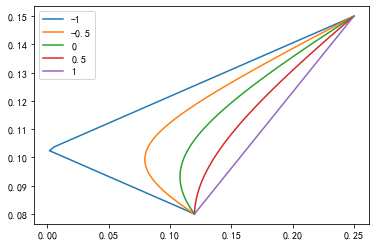

In [19]:
#我打算构建一些与股票相关的数据图像，所以选取了五只股票来进行数据分析
#首先先画出了不同相关系数下的图像，这个在金融中很常见


import os
os.getcwd()
import numpy as np
from scipy import stats
import pandas as pd
import pathlib as path_
import matplotlib
import matplotlib.pyplot as plt
from scipy import linalg
import math
def cal_mean(frac):
    return(0.08*frac+0.15*(1-frac))

mean=list(map(cal_mean,[x/50 for x in range(51)]))
sd_mat=np.array([list(map(lambda x: math.sqrt((x**2)*0.12**2+
((1-x)**2)*0.25**2+2*x*(1-x)*(-1.5+i*0.5)*0.12*0.25),[x/50 for x in range(51)])
) for i in range(1,6)])
#[expression for variable in sequence] list comprehension
#不同相关系数下，投资组合标准差随投资比例变动的情况
plt.plot(sd_mat[0,:],mean,label='-1')
plt.plot(sd_mat[1,:],mean,label='-0.5')
plt.plot(sd_mat[2,:],mean,label='0')
plt.plot(sd_mat[3,:],mean,label='0.5')
plt.plot(sd_mat[4,:],mean,label='1')
plt.legend(loc='upper left')

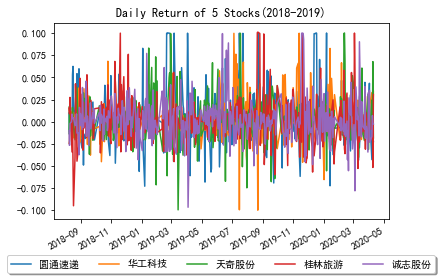

In [20]:
#利用Markowitz 模型进行数量化的资产配置。以上证50指数的5只成分股作为研究对象，
#数据时间为2018年初至2020年上半年。并且对它们的日回报进行画图


file_name=path_.PurePath('D:\\文档\\金融数据获取与处理\\数据.txt')

stock=pd.read_table(file_name,sep='\t',index_col='Trddt')
stock.index=pd.to_datetime(stock.index)

华工科技=stock.loc[stock.Stkcd==988,'Dretwd']
华工科技.name='华工科技'
天奇股份=stock.loc[stock.Stkcd==2009,'Dretwd']
天奇股份.name='天奇股份'
桂林旅游=stock.loc[stock.Stkcd==978,'Dretwd']
桂林旅游.name='桂林旅游'
诚志股份=stock.loc[stock.Stkcd==990,'Dretwd']
诚志股份.name='诚志股份'
圆通速递=stock.loc[stock.Stkcd==60004,'Dretwd']
圆通速递.name='圆通速递'
sh_return=pd.concat([圆通速递,华工科技,天奇股份,桂林旅游,诚志股份],axis=1)#举证
sh_return.head()



#查看各股的累积回报率
sh_return=sh_return.dropna() 
corr=sh_return.corr()
corr

sh_return.plot()
plt.title('Daily Return of 5 Stocks(2018-2019)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),
           ncol=5,fancybox=True,shadow=True)

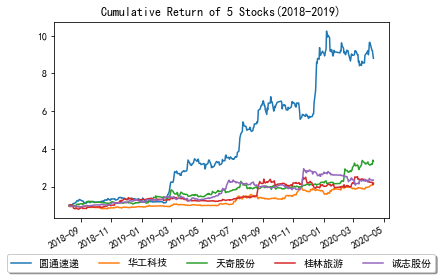

In [21]:
#对股票的日回报求和，即累积回报画图


cumreturn=(1+sh_return).cumprod()
cumreturn.plot()
plt.title('Cumulative Return of 5 Stocks(2018-2019)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),
           ncol=5,fancybox=True,shadow=True)

sh_return.corr()


mu=sh_return.mean()
sigma=sh_return.std()


D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' inste

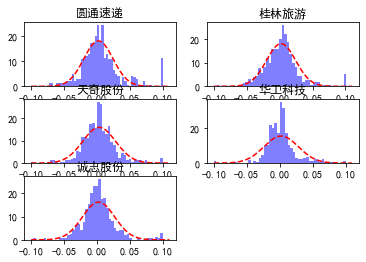

In [22]:
#还可以对它们的正态分布进行统计化分析


mu=sh_return.mean()
sigma=sh_return.std()

fig=plt.figure()
ax1=plt.subplot(321)
num_bins = 50 #直方图柱子的数量 
n, bins, patches = plt.hist(sh_return['圆通速递'], num_bins,normed=1, facecolor='blue',alpha=0.5)
y = stats.norm.pdf(np.arange(-0.1,0.11,0.001), mu[1], sigma[1])#拟合一条最佳正态分布曲线y 
plt.plot(np.arange(-0.1,0.11,0.001), y, 'r--') #绘制y的曲线 
ax1.set_title('圆通速递')

ax2=plt.subplot(322)
ax2.set_title('桂林旅游')
num_bins = 50 #直方图柱子的数量 
n, bins, patches = plt.hist(sh_return['桂林旅游'],num_bins,normed=1, facecolor='blue', alpha=0.5)
y = stats.norm.pdf(np.arange(-0.1,0.11,0.001), mu[1], sigma[1])#拟合一条最佳正态分布曲线y 
plt.plot(np.arange(-0.1,0.11,0.001), y, 'r--') #绘制y的曲线 

ax3=plt.subplot(323)
ax3.set_title('天奇股份')
num_bins = 50 #直方图柱子的数量 
n, bins, patches = plt.hist(sh_return['天奇股份'], num_bins,normed=1, facecolor='blue', alpha=0.5)
y = stats.norm.pdf(np.arange(-0.1,0.11,0.001), mu[2], sigma[2])#拟合一条最佳正态分布曲线y 
plt.plot(np.arange(-0.1,0.11,0.001), y, 'r--') #绘制y的曲线 

ax4=plt.subplot(324)
ax4.set_title('华工科技')
num_bins = 50 #直方图柱子的数量 
n, bins, patches = plt.hist(sh_return['华工科技'], num_bins,normed=1, facecolor='blue', alpha=0.5)
y = stats.norm.pdf(np.arange(-0.1,0.11,0.001), mu[3], sigma[3])#拟合一条最佳正态分布曲线y 
plt.plot(np.arange(-0.1,0.11,0.001), y, 'r--') #绘制y的曲线 

ax5=plt.subplot(325)
ax5.set_title('诚志股份')
num_bins = 50 #直方图柱子的数量 
n, bins, patches = plt.hist(sh_return['诚志股份'], num_bins,normed=1, facecolor='blue', alpha=0.5)
y = stats.norm.pdf(np.arange(-0.1,0.11,0.001), mu[4], sigma[4])#拟合一条最佳正态分布曲线y 
plt.plot(np.arange(-0.1,0.11,0.001), y, 'r--') #绘制y的曲线 


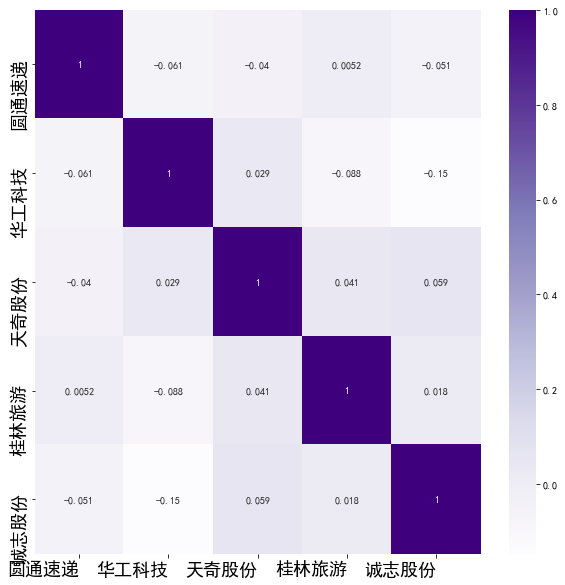

In [23]:
#最后用热力图来表示


import seaborn as sns#画热力图的库
fig,ax = plt.subplots(figsize=(10,10))
ax.set_yticklabels(['华工科技','诚志股份','天奇股份','圆通速递','桂林旅游'], fontsize = 18, rotation = 360)
ax.set_xticklabels(['华工科技','诚志股份','天奇股份','圆通速递','桂林旅游'], fontsize = 18, horizontalalignment='right')
sns.heatmap(sh_return.corr(),cmap ="Purples",annot=True)


In [24]:
#最后我们大致看一下各只股票之间的相关性，可以与以上图形进行对照


sh_return.corr()

圆通速递      华工科技      天奇股份      桂林旅游      诚志股份
圆通速递  1.000000 -0.061036 -0.039957  0.005191 -0.050555
华工科技 -0.061036  1.000000  0.028830 -0.087543 -0.147105
天奇股份 -0.039957  0.028830  1.000000  0.041148  0.058914
桂林旅游  0.005191 -0.087543  0.041148  1.000000  0.018033
诚志股份 -0.050555 -0.147105  0.058914  0.018033  1.000000